In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.430599172228036e-18

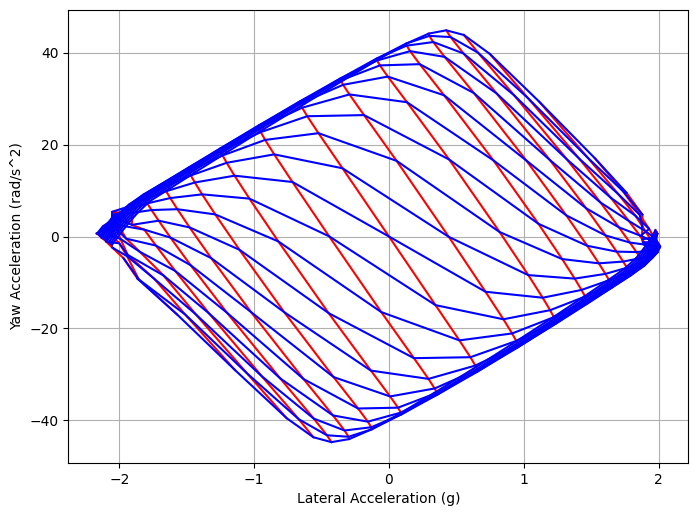

In [2]:
df = pd.read_csv("MMM.csv")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    lat_accel = list(df2["vehicle_accelerations_NTB_1"]/9.81)
    yaw_accel = list(df2["yaw_acceleration"])
    mid_point = int(len(lat_accel)/2)

    ax.plot(lat_accel, yaw_accel, 'r')
    #ax.text(lat_accel[mid_point], yaw_accel[mid_point], '{0:.2f}'.format(x*180/math.pi))

for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        ax.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b')
ax.grid()
ax.set_ylabel("Yaw Acceleration (rad/s^2)")
ax.set_xlabel("Lateral Acceleration (g)")

abs(df["yaw_acceleration"]).min()

In [3]:
for ii in df.columns:
    print(ii)

Unnamed: 0
vehicle_turn_radius
aero_forces_0
aero_forces_1
aero_forces_2
aero_moments_0
aero_moments_1
aero_moments_2
front_left_tire_f_roll
front_left_tire_f_heave
front_left_tire_z_c
front_left_tire_velocity_0
front_left_tire_velocity_1
front_left_tire_velocity_2
front_left_tire_steering_inclination
front_left_tire_roll_inclination
front_left_tire_heave_inclination
front_left_tire_pitch_inclination
front_left_tire_tire_centric_forces_0
front_left_tire_tire_centric_forces_1
front_left_tire_tire_centric_forces_2
front_left_tire_inclination_angle
front_left_tire_slip_angle
front_left_tire_vehicle_centric_forces_0
front_left_tire_vehicle_centric_forces_1
front_left_tire_vehicle_centric_forces_2
front_left_tire_vehicle_centric_moments_0
front_left_tire_vehicle_centric_moments_1
front_left_tire_vehicle_centric_moments_2
front_left_tire_inclination_angle_force_loss
front_left_tire_inclination_angle_percent_loss
front_left_FUCA_force
front_left_FLCA_force
front_left_RUCA_force
front_left_RLC

In [4]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'pullrod', 'toe_link']:
    print(df['front_left_{}_force'.format(tube)].max() / 4.448)

608.4285660682177
188.7864211603285
181.5490136161088
242.19250260855725
339.6892375948146
-0.0


In [5]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'pullrod', 'toe_link']:
    print(df['front_right_{}_force'.format(tube)].max() / 4.448)

457.26069515053854
-81.71002526474945
85.44488179625056
508.65284614301294
407.21365428075916
-78.76090477742333


In [6]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'pullrod', 'toe_link']:
    print(df['rear_left_{}_force'.format(tube)].max() / 4.448)

2772.9310599813034
599.6347304389042
757.3002051377424
1202.9810778473243
-732.9370077202856
-128.67802108084527


In [25]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'pullrod', 'toe_link']:
    print(df['rear_right_{}_force'.format(tube)].max() / 4.448)

2384.9572204556102
270.44715736313765
385.45132167570677
1001.3584908844819
-2226.3560376387163
-228.4010842110585


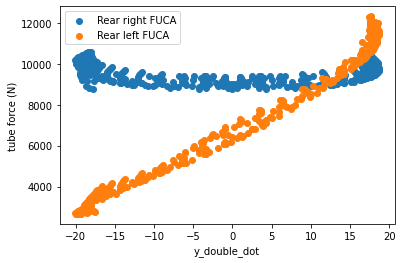

In [8]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_FUCA_force'], label='Rear right FUCA')
plt.scatter(df['y_double_dot'], df['rear_left_FUCA_force'], label='Rear left FUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()

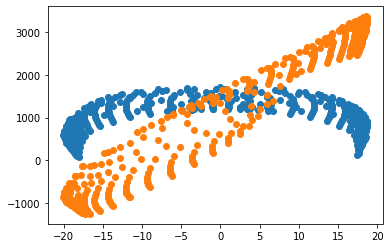

In [9]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_FLCA_force'])
plt.scatter(df['y_double_dot'], df['rear_left_FLCA_force'])
plt.show()

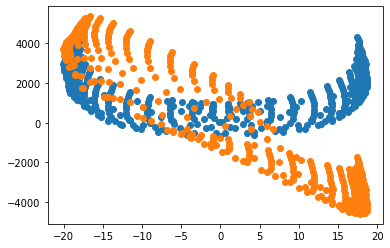

In [10]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_RLCA_force'])
plt.scatter(df['y_double_dot'], df['rear_left_RLCA_force'])
plt.show()

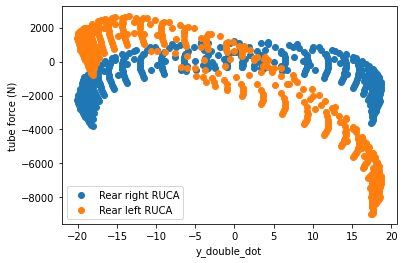

In [11]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_RUCA_force'], label='Rear right RUCA')
plt.scatter(df['y_double_dot'], df['rear_left_RUCA_force'], label='Rear left RUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()

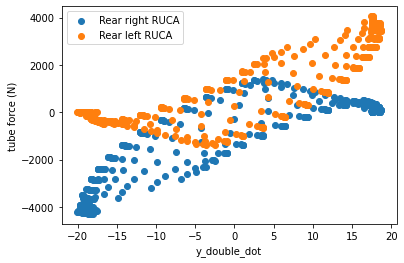

In [12]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_vehicle_centric_forces_1'], label='Rear right RUCA')
plt.scatter(df['y_double_dot'], df['rear_left_tire_vehicle_centric_forces_1'], label='Rear left RUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()

In [13]:
def get_front_tube_forces(force_in, get_lengths=False):
    force_arr = np.array(force_in)
    
    # Inputs (in inches, from CAD)
    pt1_i = np.array([0.063, 2.138, 11.539]).reshape((3, 1))
    pt1_f = np.array([5.875, 14.641, 7.759]).reshape((3, 1))

    pt2_i = np.array([0.063, 2.138, 11.539]).reshape((3, 1))
    pt2_f = np.array([-7.375, 14.641, 6.066]).reshape((3, 1))

    pt3_i = np.array([0.066, 1.6, 4.208]).reshape((3, 1))
    pt3_f = np.array([5.875, 15.791, 2.129]).reshape((3, 1))

    pt4_i = np.array([0.066, 1.6, 4.208]).reshape((3, 1))
    pt4_f = np.array([-7.373, 15.791, 2.402]).reshape((3, 1))

    pt5_i = np.array([0.08, 3.718, 4.925]).reshape((3, 1))
    pt5_f = np.array([-5.519, 11.975, 21.429]).reshape((3, 1))

    pt6_i = np.array([2.935, 2.393, 11.049]).reshape((3, 1))
    pt6_f = np.array([4.262, 13.291, 7.523]).reshape((3, 1))

    # Calculate
    pt_i_arr = np.concatenate((pt1_i, pt2_i, pt3_i, pt4_i, pt5_i, pt6_i), axis=1)
    pt_f_arr = np.concatenate((pt1_f, pt2_f, pt3_f, pt4_f, pt5_f, pt6_f), axis=1)

    v_arr = pt_f_arr - pt_i_arr
    lengths = np.apply_along_axis(np.linalg.norm, 0, v_arr)
    n_arr = v_arr / lengths
    
    # Set up Equation
    lever_arms = pt_i_arr * 0.0254 #in to m
    arr_cross = np.cross(n_arr.T, lever_arms.T).T 
    arr_coeff = np.concatenate((n_arr, arr_cross))
    
    # Solve
    b = np.concatenate((force_arr, np.zeros(3)))
    tube_forces = np.linalg.solve(arr_coeff, b)
    
    if get_lengths:
        return tube_forces, lengths
    else:
        return tube_forces

def get_rear_tube_forces(force_in, get_lengths=False):
    force_arr = np.array(force_in)
    # Inputs (in inches, from CAD)
    pt1_i = np.array([-0.126, 1.549, 12.583]).reshape((3, 1))
    pt1_f = np.array([7.125, 11.492, 9.55]).reshape((3, 1))

    pt2_i = np.array([-0.126, 1.549, 12.583]).reshape((3, 1))
    pt2_f = np.array([-7.75, 11.492, 9.55]).reshape((3, 1))

    pt3_i = np.array([0.131, 1.164, 5.243]).reshape((3, 1))
    pt3_f = np.array([7.124, 13.242, 3.354]).reshape((3, 1))

    pt4_i = np.array([0.131, 1.164, 5.243]).reshape((3, 1))
    pt4_f = np.array([-5.499, 13.242, 3.613]).reshape((3, 1))

    pt5_i = np.array([-0.043, 2.38, 11.279]).reshape((3, 1))
    pt5_f = np.array([5.576, 11.847, 4.112]).reshape((3, 1))

    pt6_i = np.array([3.498, 1.026, 9.11]).reshape((3, 1))
    pt6_f = np.array([7.125, 12.089, 7.433]).reshape((3, 1))
    
    # Calculate
    pt_i_arr = np.concatenate((pt1_i, pt2_i, pt3_i, pt4_i, pt5_i, pt6_i), axis=1)
    pt_f_arr = np.concatenate((pt1_f, pt2_f, pt3_f, pt4_f, pt5_f, pt6_f), axis=1)

    v_arr = pt_f_arr - pt_i_arr
    lengths = np.apply_along_axis(np.linalg.norm, 0, v_arr)
    n_arr = v_arr / lengths
    
    # Set up Equation
    lever_arms = pt_i_arr * 0.0254 #in to m
    arr_cross = np.cross(n_arr.T, lever_arms.T).T 
    arr_coeff = np.concatenate((n_arr, arr_cross))
    
    # Solve
    b = np.concatenate((force_arr, np.zeros(3)))
    tube_forces = np.linalg.solve(arr_coeff, b)
    
    if get_lengths:
        return tube_forces, lengths
    else:
        return tube_forces

In [14]:
df_vcf_rr = df[['rear_right_tire_vehicle_centric_forces_0', 'rear_right_tire_vehicle_centric_forces_1', 'rear_right_tire_vehicle_centric_forces_2']]#[np.abs(df['y_double_dot']) < 1]

In [15]:
df_tubes_rr = df_vcf_rr.apply(get_rear_tube_forces, axis=1)

In [22]:
np.stack(df_tubes_rr.values).max(0) / 4.448

array([1885.40679687,  501.47979381,  306.24101164,  372.08471076,
         -0.        ,   -0.        ])

In [17]:
np.argmax(np.stack(df_tubes_rr.values)[0,:])
#df_vcf_rr
#df['rear_right_tire_vehicle_centric_forces_1'].max()

0

In [18]:
df_vcf_rl = df[['rear_left_tire_vehicle_centric_forces_0', 'rear_left_tire_vehicle_centric_forces_1', 'rear_left_tire_vehicle_centric_forces_2']]#[np.abs(df['y_double_dot']) < 1]

In [19]:
df_tubes_rl = df_vcf_rl.apply(get_rear_tube_forces, axis=1)

In [23]:
np.stack(df_tubes_rl.values).max(0) / 4.448

array([1.24077116e+03, 2.12833814e+02, 5.96894478e+02, 1.35525364e+03,
       1.56599792e-01, 6.78863987e-02])

In [21]:
df_test = pd.concat([df_vcf_rl, df_vcf_rr], axis=1)
df_test.head()

,rear_left_tire_vehicle_centric_forces_0,rear_left_tire_vehicle_centric_forces_1,rear_left_tire_vehicle_centric_forces_2,rear_right_tire_vehicle_centric_forces_0,rear_right_tire_vehicle_centric_forces_1,rear_right_tire_vehicle_centric_forces_2
0,-1.542536,-6.938460,0.081408,-1234.596448,-4293.311697,2366.212764
1,0.000000,0.000000,0.000000,-1231.820464,-4288.994359,2362.982286
2,0.000000,0.000000,0.000000,-1229.468133,-4286.265454,2362.379157
3,-2.278899,-10.313863,2.072339,-1224.879018,-4274.892713,2351.183607
4,-2.049220,-9.288055,1.466662,-1223.321402,-4273.149066,2350.814485
